In [38]:
install.packages("corrplot")
library(ggplot2)
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
auto_data <- read.table("/content/Auto.data", header = TRUE, na.strings = "?")
head(auto_data)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [2]:
unique(auto_data$year)

[1] 70 71 72 73 74 75 76 77 78 79 80 81 82

In [3]:
unique(auto_data$origin)

[1] 1 3 2

**Cleaning Missing Values**

In [4]:
sum(is.na(auto_data))

[1] 5

In [5]:
auto_data_cleaned <- na.omit(auto_data)

In [19]:
auto_data_cleaned[84,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
85,27,4,97,88,2100,16.5,72,3,toyota corolla 1600 (sw)


In [6]:
sum(is.na(auto_data_cleaned))

[1] 0

In [7]:
sapply(auto_data_cleaned[c("mpg","cylinders","displacement","horsepower","weight","acceleration","year")],
range)

# apply family functions in R help us apply a function to elements of a data structure without
# writing loops manually. sapply returns a simplified structure (matrix or vector), easier to read.

mpg,cylinders,displacement,horsepower,weight,acceleration,year
9.0,3,68,46,1613,8.0,70
46.6,8,455,230,5140,24.8,82


In [11]:
quant_variables <- auto_data_cleaned[c("mpg","cylinders","displacement","horsepower",
                                "weight","acceleration","year")]

summary_table <- data.frame (
  Mean = sapply(quant_variables, mean),
  Standard_Deviation = sapply(quant_variables, sd)
)

summary_table <- round(summary_table, 3)
summary_table

,Mean,Standard_Deviation
,<dbl>,<dbl>
mpg,23.446,7.805
cylinders,5.472,1.706
displacement,194.412,104.644
horsepower,104.469,38.491
weight,2977.584,849.403
acceleration,15.541,2.759
year,75.980,3.684


In [21]:
auto_data_trimmed <- auto_data_cleaned[-(10:84),]

In [30]:
quant_variables_trimmed <- auto_data_trimmed[c("mpg","cylinders","displacement","horsepower","weight","acceleration","year")]

summary_table <- data.frame(
  Mean = round(sapply(quant_variables_trimmed, mean), 3),
  SD = round(sapply(quant_variables_trimmed, sd), 3),
  Min = round(sapply(quant_variables_trimmed, min), 3),
  Max = round(sapply(quant_variables_trimmed, max), 3)
)

summary_table$Range <- paste0(summary_table$Min, " – ", summary_table$Max)
summary_table <- summary_table[, c("Mean", "SD", "Range")]

summary_table

,Mean,SD,Range
,<dbl>,<dbl>,<chr>
mpg,24.368,7.881,11 – 46.6
cylinders,5.382,1.658,3 – 8
displacement,187.754,99.939,68 – 455
horsepower,100.956,35.896,46 – 230
weight,2939.644,812.650,1649 – 4997
acceleration,15.718,2.694,8.5 – 24.8
year,77.132,3.110,70 – 82


**Data Visualization**

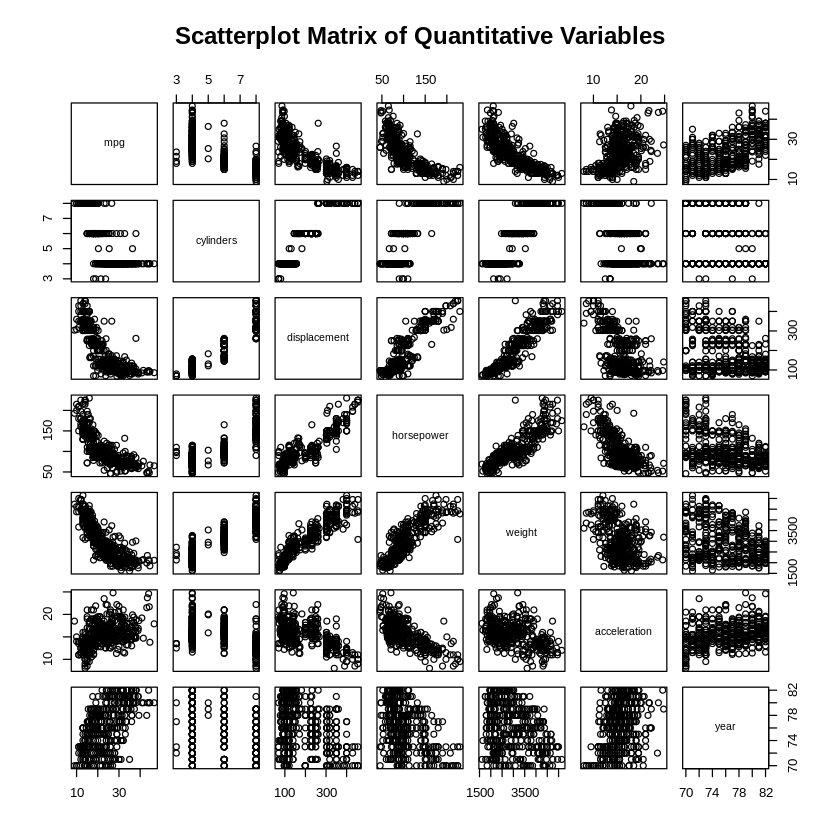

In [41]:
quant_vars <- auto_data_cleaned[, c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year")]

pairs(quant_vars, main = "Scatterplot Matrix of Quantitative Variables")

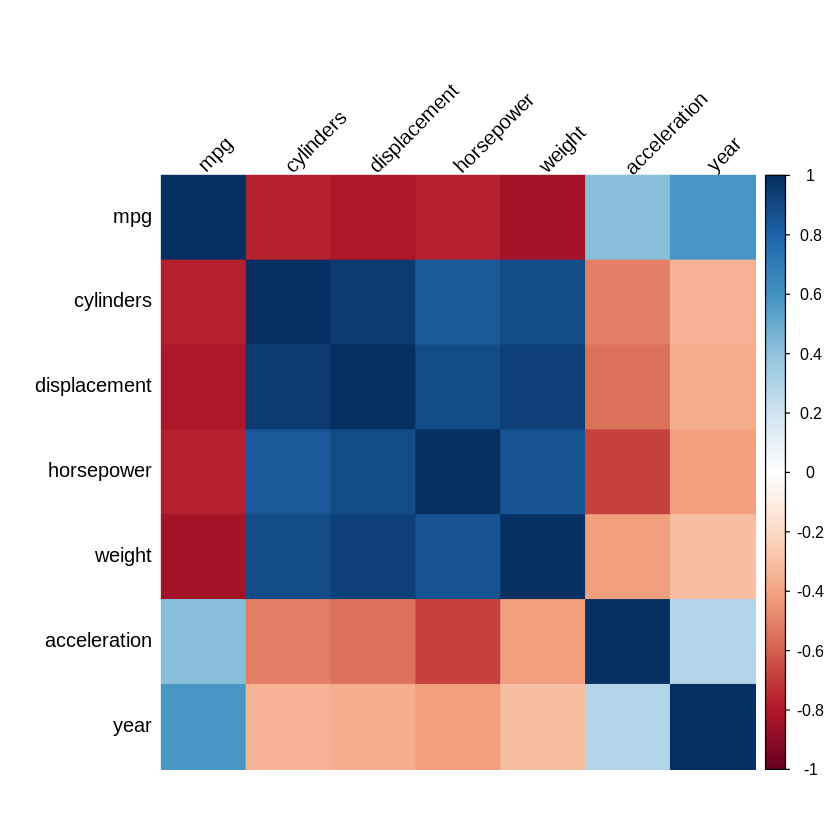

In [42]:
cor_matrix <- cor(quant_vars)
corrplot(cor_matrix, method = "color", type = "full", tl.col = "black", tl.srt = 45)

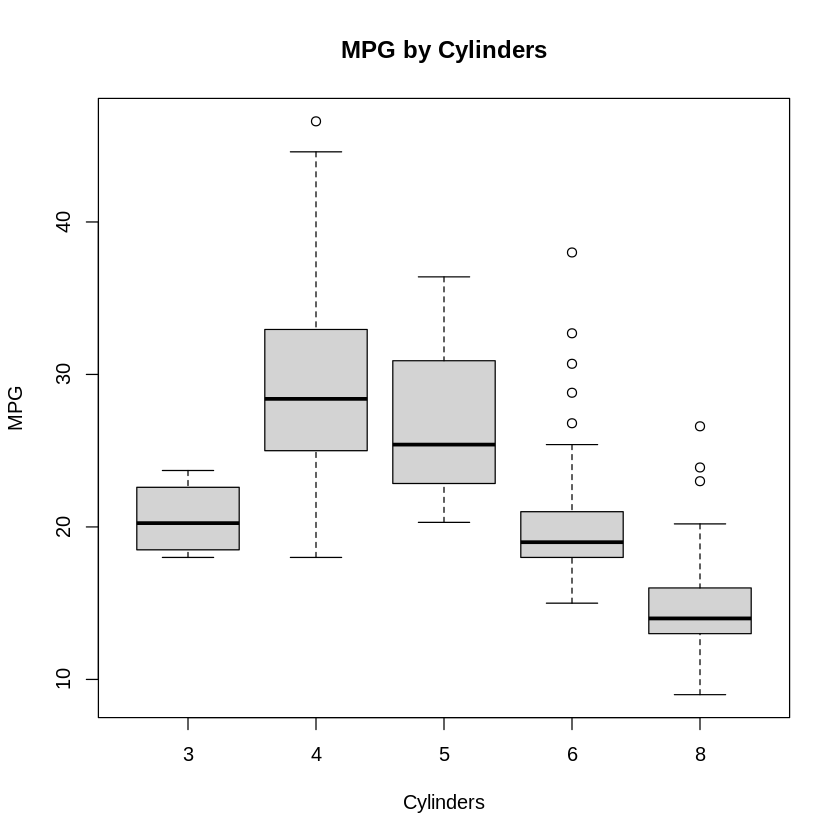

In [43]:
boxplot(mpg ~ cylinders, data = auto_data_cleaned, xlab = "Cylinders", ylab = "MPG", main = "MPG by Cylinders")

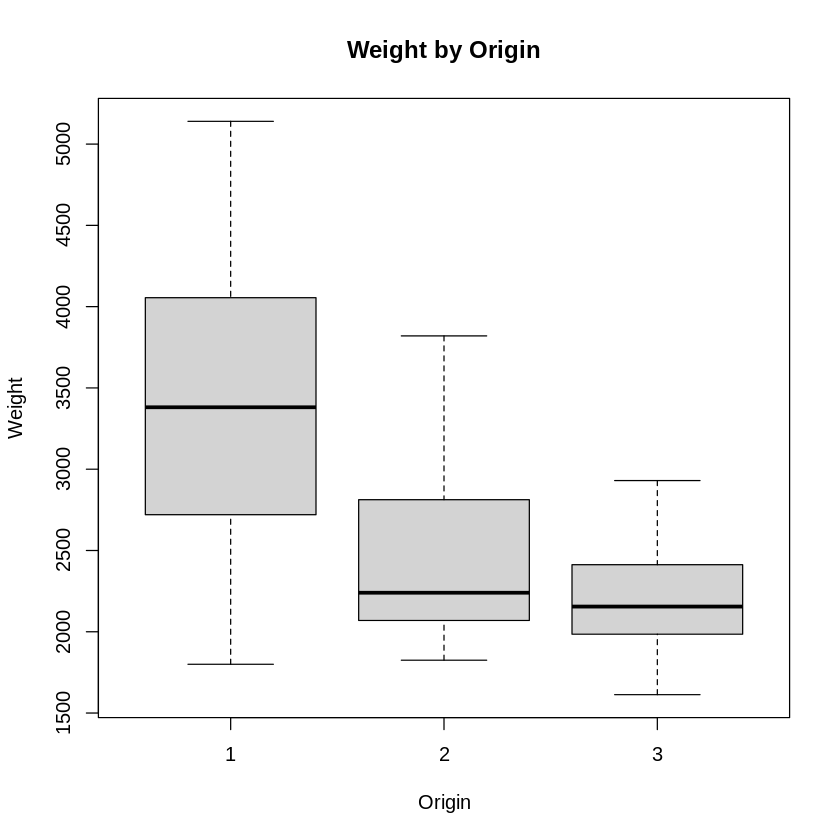

In [44]:
boxplot(weight ~ origin, data = auto_data_cleaned, xlab = "Origin", ylab = "Weight", main = "Weight by Origin")

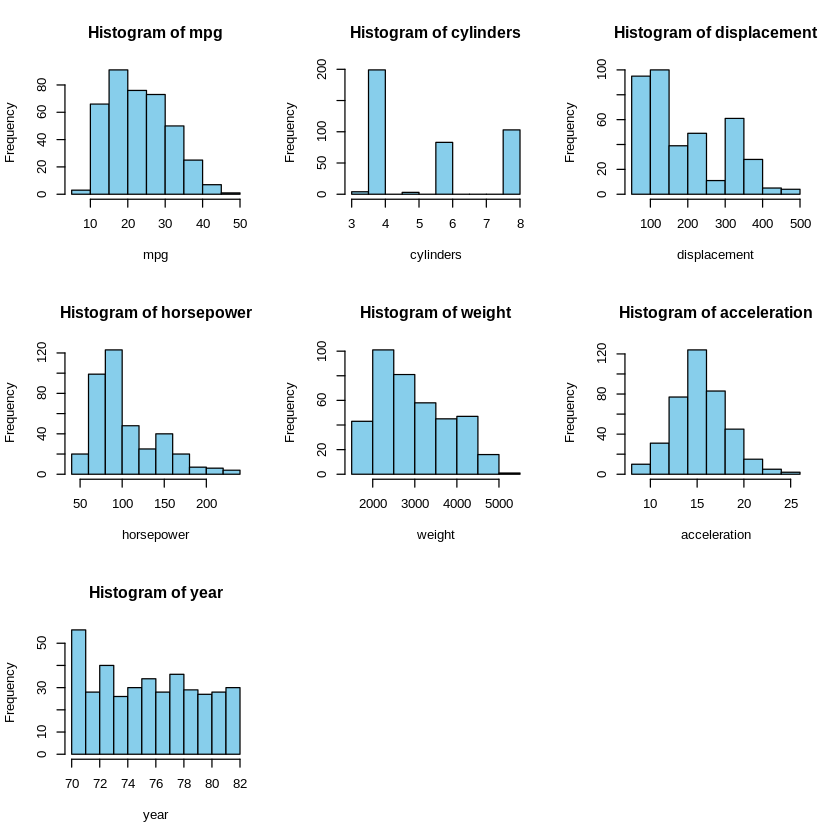

In [54]:
quant_vars <- c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "year")

par(mfrow = c(3, 3))

for (var in quant_vars) {
  hist(auto_data_cleaned[[var]],
       main = paste("Histogram of", var),
       xlab = var,
       col = "skyblue")
}

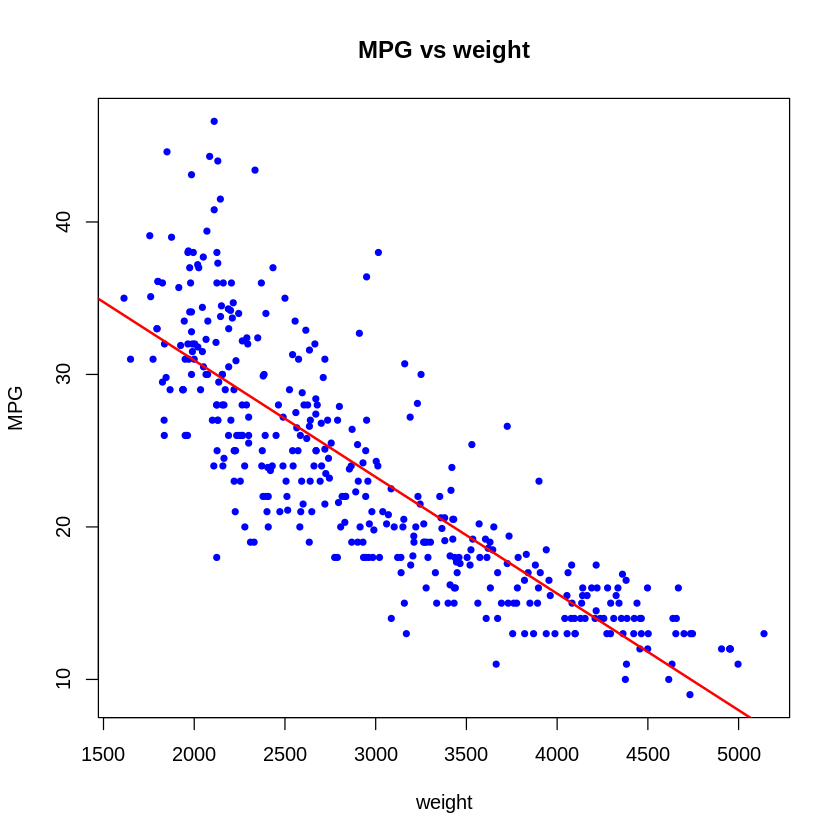

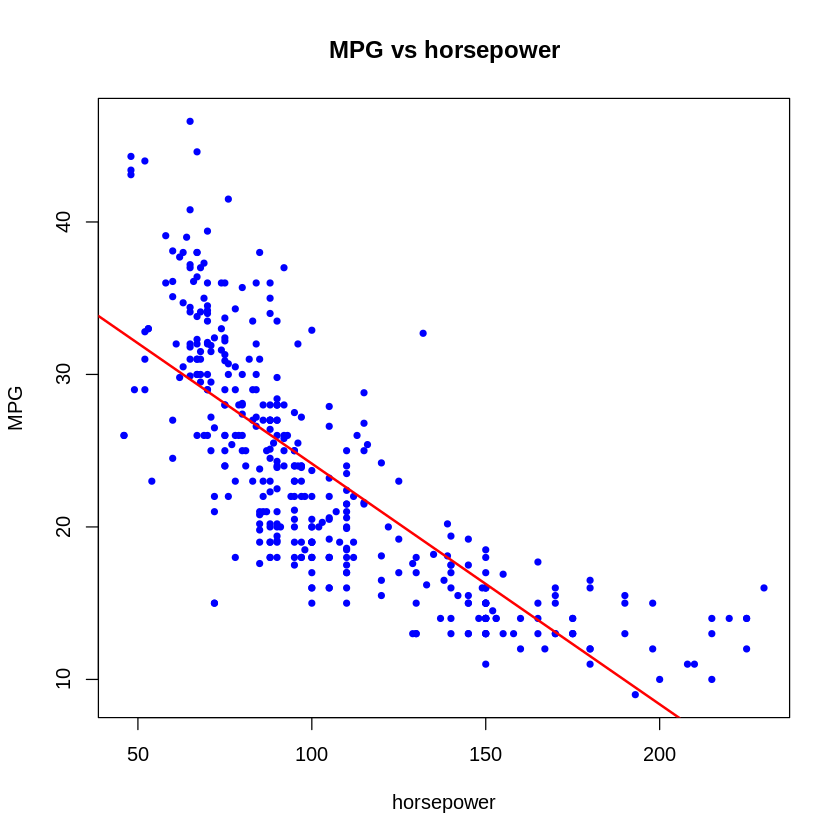

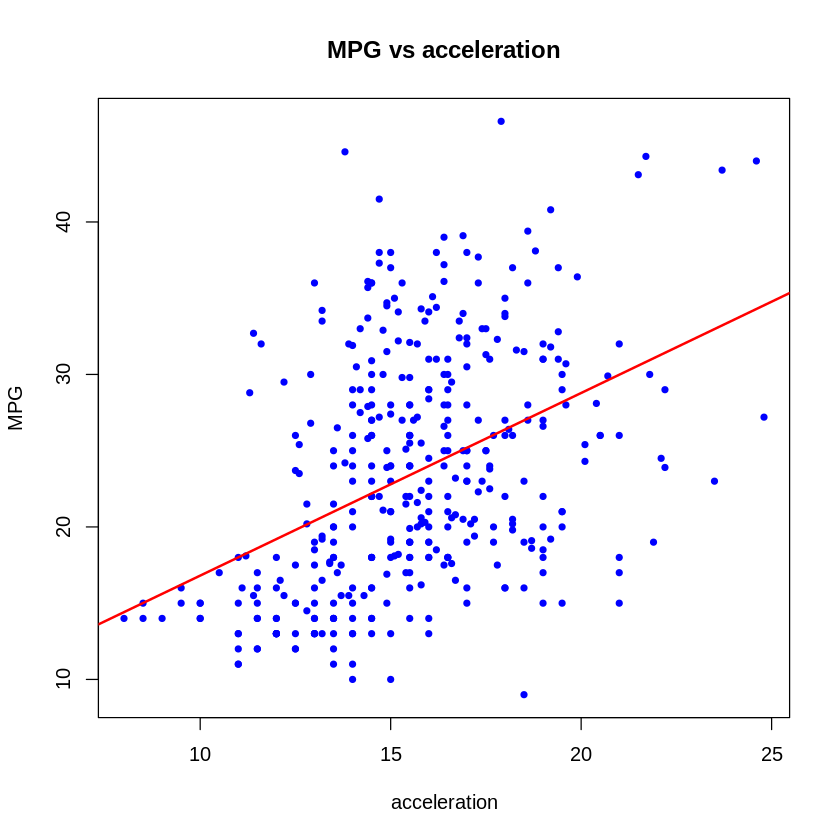

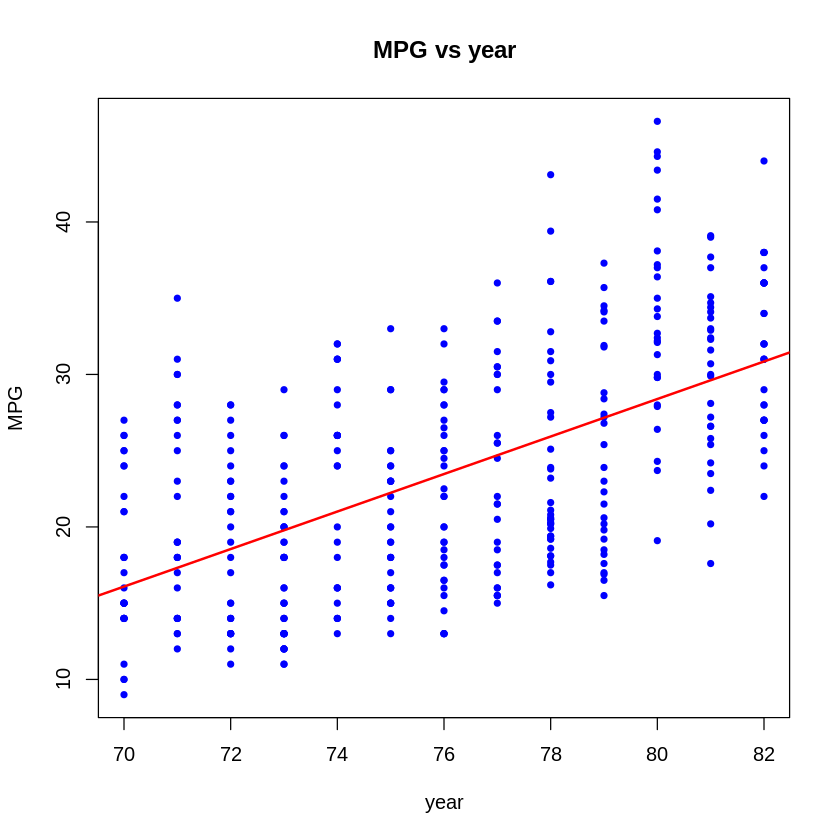

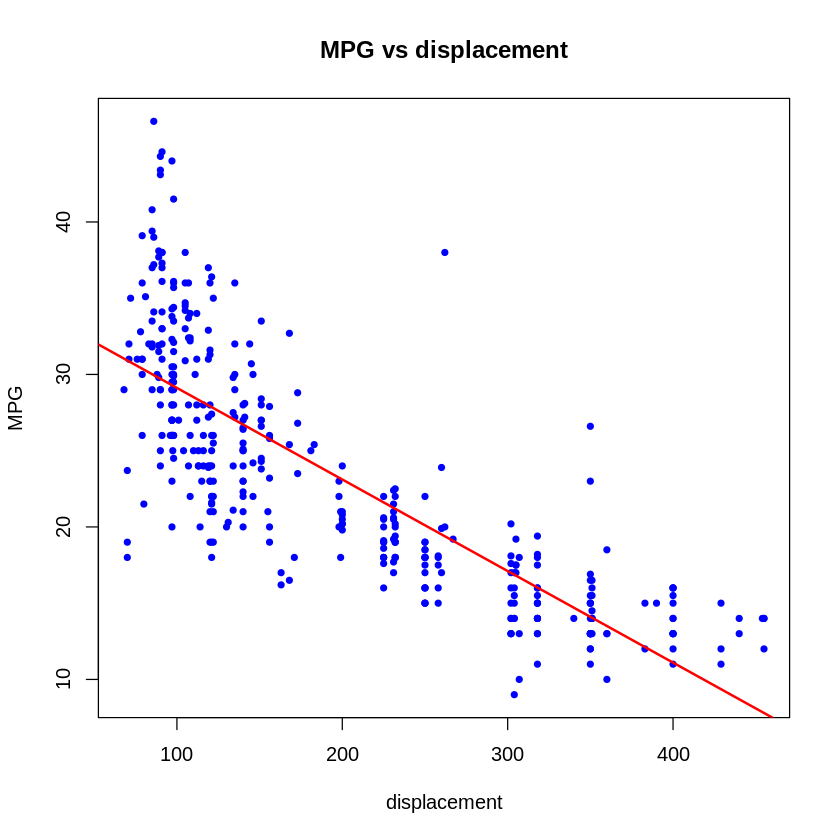

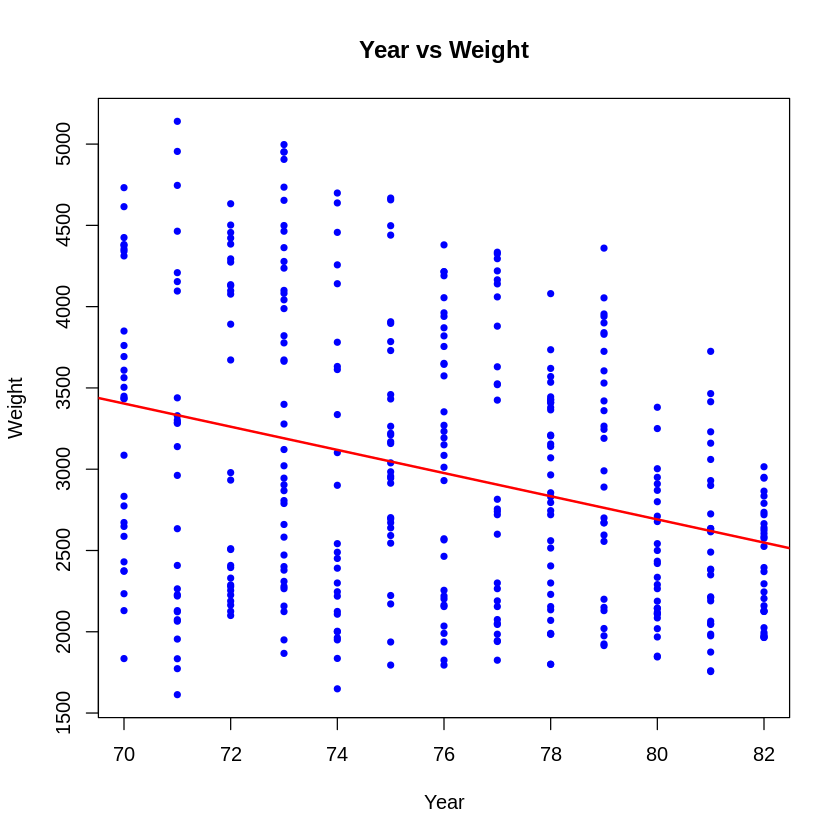

In [67]:

predictors <- c("weight", "horsepower", "acceleration", "year", "displacement")


for (var in predictors) {
  plot(auto_data_cleaned[[var]], auto_data_cleaned$mpg,
       main = paste("MPG vs", var),
       xlab = var,
       ylab = "MPG",
       col = "blue",
       pch = 20)


  abline(lm(auto_data_cleaned$mpg ~ auto_data_cleaned[[var]]),
         col = "red", lwd = 2)
}


plot(auto_data_cleaned$year, auto_data_cleaned$weight,
     main = "Year vs Weight",
     xlab = "Year", ylab = "Weight",
     col = "blue", pch = 20)

abline(lm(weight ~ year, data = auto_data_cleaned),
       col = "red", lwd = 2)